# 2. Graphical representations of a von Neumann measurement for symmetric qubits

In this notebook MSPRT is applyied to three symmetric qubits using a von Neumann measurement. With the results two different graphical representations are generated.

Cells 1-4 define the needed parameters and functions.

Cell 5 computes the MSPRT that generates the data for the graphical representations.

Cell 6 generates the gif of the triangle of probabilities. In my case the code does not compile in the notebook, to generate the gif I need to copy the code from cells 1-6 into a .py file and compile it.

Cell 7 generates the random walk representation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

In [2]:
def Rotacio(omega,vector):
    a = np.cos(omega)*vector[0]-np.sin(omega)*vector[1] 
    b = np.sin(omega)*vector[0]+np.cos(omega)*vector[1]
    return np.array((a,b))
                
def probabilitats(rho,pi,i):
    A = np.zeros(len(pi))
    for k in range(len(pi)):
        A[k] = np.trace(np.dot(pi[k],rho[i]))
    return abs(A)
    
def likelihood_ratio(tirs,prob_matrix, priors):
    a,b,c = priors[0],priors[1],priors[2]
    # prob_matrix[0].shape[1] és el nombre de outputs
    for k in range(prob_matrix[0].shape[1]):
        a *=  prob_matrix[0,k]**tirs[k]
        b *=  prob_matrix[1,k]**tirs[k]
        c *=  prob_matrix[2,k]**tirs[k]
    return np.array((a/(a+b+c),b/(a+b+c), c/(a+b+c)))



In [3]:
def mAij(m,i,j, alpha,ps,priors):
    return (np.log((1-alpha)/alpha)-np.log(priors[i]/priors[j])-m*np.log((1-ps[i])/(1-ps[j])))/(np.log(ps[i]/ps[j])-np.log((1-ps[i])/(1-ps[j])))
def Rm(m, i, j, alpha, ps, priors): 
    return np.log((priors[i]/priors[j])*(1-alpha)/alpha)/(np.log(ps[j]/ps[i])-np.log((1-ps[j])/(1-ps[i])))+m*np.log((1-ps[i])/(1-ps[j]))/(np.log(ps[j]/ps[i])-np.log((1-ps[j])/(1-ps[i])))
def Am(m, i, j, alpha, ps, priors): 
    return np.log((priors[j]/priors[i])*(alpha)/(1-alpha))/(np.log(ps[j]/ps[i])-np.log((1-ps[j])/(1-ps[i])))+m*np.log((1-ps[i])/(1-ps[j]))/(np.log(ps[j]/ps[i])-np.log((1-ps[j])/(1-ps[i])))
def ordering(a,b):
    c = np.argsort(a)
    d=[]
    for i in range (len(a)):
        d.append(b[c[i]])
    return d

In [4]:
alpha = 0.001 #Error bound
estat = 1
theta = np.pi/7

prior0= 1/3
prior1 = 1/3
prior2 = 1/3
priors = [prior0,prior1,prior2]
r0 = 1
r1 = 1
r2 = 1 
r = [r0,r1,r2]
#r = np.repeat(0.9,3)

psi0 = np.array((1,0))
psi1 = Rotacio(np.pi/3,psi0)
psi2 = Rotacio(2*np.pi/3,psi0)
rho0 = r[0]*np.tensordot(psi0,psi0,axes = 0)+(1-r[0])*np.identity(2)/2
rho1 = r[1]*np.tensordot(psi1,psi1,axes = 0)+(1-r[1])*np.identity(2)/2
rho2 = r[2]*np.tensordot(psi2,psi2,axes = 0)+(1-r[2])*np.identity(2)/2
rho = [rho0,rho1,rho2]

#symmetric POVM
psitheta0 = np.array((np.cos(theta/2), np.sin(theta/2)))
psitheta1 = Rotacio(np.pi/2,psitheta0)
pi0 = np.tensordot(psitheta0,psitheta0,axes=0)
pi1 = np.tensordot(psitheta1,psitheta1,axes=0)
pi = [pi0,pi1]

prob_matrix = np.matrix([probabilitats(rho,pi,0),probabilitats(rho,pi,1),probabilitats(rho,pi,2)])

ps0 = np.array(prob_matrix[:,1])
ps = np.ndarray.flatten(ps0)

In [5]:
m=1
dm = 0
tirs = np.zeros(2)

p0 = likelihood_ratio(tirs,prob_matrix,priors)[0]
p1 = likelihood_ratio(tirs,prob_matrix,priors)[1]
p2 = likelihood_ratio(tirs,prob_matrix,priors)[2]
x=[(p1+p0*np.sin(np.pi/6))/np.cos(np.pi/6)]
y=[p0]

tirades=[]
comulative = [0]
zn = 0
while m >= 0:
    
    output =  np.random.choice(len(pi), p = probabilitats(rho,pi,estat))
    tirades.append(output)
    tirs[output] += 1
    zn +=output
    comulative.append(zn)
    
    n = m
    
    p0 = likelihood_ratio(tirs,prob_matrix,priors)[0]
    p1 = likelihood_ratio(tirs,prob_matrix,priors)[1]
    p2 = likelihood_ratio(tirs,prob_matrix,priors)[2]
    x.append((p1+p0*np.sin(np.pi/6))/np.cos(np.pi/6))
    y.append(p0)

    
    for i in range(3):
        if likelihood_ratio(tirs,prob_matrix,priors)[i]>=1-alpha:
            print('n = '+str(n))
            print("State: "+str(i))
            m = -10
    m+=1
print(tirades)

n = 14
State: 1
[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1]


In [ ]:
#GIF TRIANGLE
fig, ax= plt.subplots(figsize=(5.5, 4))
fig.set_tight_layout(True)
ims = []

a = np.tan(np.pi/6)
plt.plot([0,a],[0,1], c="blue")
plt.plot([0,2*a],[0,0], c="blue")
plt.plot([a,2*a],[1,0], c="blue")
plt.plot([a*(1-alpha),a*(1+alpha)],[1-alpha,1-alpha], c="black", ls = "--")
plt.text(a-0.04,1.05, "H0")
plt.text(-0.13,0, "H2")
plt.text(2*a+0.1,0, "H1")
plt.xlim(-0.2,1.35)
plt.ylim(-0.05,1.15)
    
for i in range(n+1):
    im= plt.scatter(x[i], y[i], c = "red")
    im2, = plt.plot(x[0:i],y[0:i], c = "grey", ls = "--")
    ims.append([im,im2])
    
    
ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True,
                                repeat_delay=5000)

writer = PillowWriter(fps=20)
ani.save("trianglequbits.gif", writer = writer)

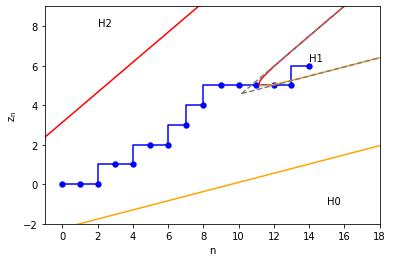

In [6]:
#PLOT RANDOM WALK

newps = np.sort(ps)
newpriors = ordering(ps,priors)
newindexs = np.argsort(ps)
x1 = np.linspace(-10,100,num = 10000)
x2 = np.linspace(x1[np.argmin(abs(Am(x1,1,0, alpha,newps,newpriors)-Rm(x1,2,1, alpha,newps,newpriors)))],100, num = 10000)
x3 = np.linspace(2*x2[0],100,num = 10000)
x4 = np.linspace(x2[0],2*x2[0],1000)

NN = 500
mm = np.linspace(x1[np.argmin(abs(Am(x1,1,0, alpha,newps,newpriors)-Rm(x1,2,1, alpha,newps,newpriors)))],2*x1[np.argmin(abs(Am(x1,1,0, alpha,newps,newpriors)-Rm(x1,2,1, alpha,newps,newpriors)))],2*NN)
dmm = mm*Rm(x2[0],2,1, alpha,newps,newpriors)/x2[0]
alpha1a, alpha1b, alpha2a, alpha2b = np.zeros((NN,2*NN)), np.zeros((NN,2*NN)),np.zeros((NN,2*NN)), np.zeros((NN,2*NN))
ind1 = np.zeros(2*NN)
ind2 = np.zeros(2*NN)
ind3 = np.zeros(2*NN)
xinicial = np.zeros(2*NN)
for j in range(2*NN): #Numerical calculation of the bounds.
    dm1 = np.linspace(Am(mm[j],1,0, alpha,newps,newpriors),mm[j]*Rm(x2[0],2,1, alpha,newps,newpriors)/x2[0],NN)
    dm2 = np.linspace(mm[j]*Rm(x2[0],2,1, alpha,newps,newpriors)/x2[0],Rm(mm[j],2,1, alpha,newps,newpriors),NN)
    for i in range(NN):
        alpha1a[i,j] = ((newps[0]**dm1[i]*(1-newps[0])**(mm[j]-dm1[i]))/(newps[1]**dm1[i]*(1-newps[1])**(mm[j]-dm1[i])))/(1+((newps[0]**dm1[i]*(1-newps[0])**(mm[j]-dm1[i]))/(newps[1]**dm1[i]*(1-newps[1])**(mm[j]-dm1[i]))))
        alpha1b[i,j] = ((newps[2]**dm1[i]*(1-newps[2])**(mm[j]-dm1[i]))/(newps[1]**dm1[i]*(1-newps[1])**(mm[j]-dm1[i])))/(1+((newps[2]**dm1[i]*(1-newps[2])**(mm[j]-dm1[i]))/(newps[1]**dm1[i]*(1-newps[1])**(mm[j]-dm1[i]))))
        alpha2a[i,j] = ((newps[0]**dm2[i]*(1-newps[0])**(mm[j]-dm2[i]))/(newps[1]**dm2[i]*(1-newps[1])**(mm[j]-dm2[i])))/(1+((newps[0]**dm2[i]*(1-newps[0])**(mm[j]-dm2[i]))/(newps[1]**dm2[i]*(1-newps[1])**(mm[j]-dm2[i]))))
        alpha2b[i,j] = ((newps[2]**dm2[i]*(1-newps[2])**(mm[j]-dm2[i]))/(newps[1]**dm2[i]*(1-newps[1])**(mm[j]-dm2[i])))/(1+((newps[2]**dm2[i]*(1-newps[2])**(mm[j]-dm2[i]))/(newps[1]**dm2[i]*(1-newps[1])**(mm[j]-dm2[i]))))
    ind1[j] = dm1[np.argmin(abs(alpha-alpha1a[:,j]-alpha1b[:,j]))]
    ind2[j] = dm2[np.argmin(abs(alpha-alpha2a[:,j]-alpha2b[:,j]))]
    alphadmm = ((newps[0]**dmm[j]*(1-newps[0])**(mm[j]-dmm[j]))/(newps[1]**dmm[j]*(1-newps[1])**(mm[j]-dmm[j])))/(1+((newps[0]**dmm[j]*(1-newps[0])**(mm[j]-dmm[j]))/(newps[1]**dmm[j]*(1-newps[1])**(mm[j]-dmm[j]))))+((newps[2]**dmm[j]*(1-newps[2])**(mm[j]-dmm[j]))/(newps[1]**dmm[j]*(1-newps[1])**(mm[j]-dmm[j])))/(1+((newps[2]**dmm[j]*(1-newps[2])**(mm[j]-dmm[j]))/(newps[1]**dmm[j]*(1-newps[1])**(mm[j]-dmm[j]))))
    xinicial[j] = alpha-alphadmm

figg2 = plt.figure()
fig2 = figg2.add_subplot(1,1,1)
fig2.step(np.arange(len(comulative)),comulative, color = "blue")

fig2.plot(x1,Rm(x1,1,0, alpha,newps,newpriors), color = "orange")
#fig2.plot(x1,Rm(x1,2,0, alpha,newps,newpriors), color = "orange")
fig2.plot(x3,Rm(x3,2,1, alpha,newps,newpriors), color = "red")
fig2.plot(x3,Am(x3,1,0, alpha,newps,newpriors), color = "orange")
#fig2.plot(x1,Am(x1,2,0, alpha,newps,newpriors), color = "orange")
fig2.plot(x1,Am(x1,2,1, alpha,newps,newpriors), color = "red")
fig2.plot(mm[np.argmin(abs(xinicial))-1:2*NN], ind1[np.argmin(abs(xinicial))-1:2*NN], color = "orange")
#fig2.plot(mm, mm*Rm(x2[0],2,1, alpha,newps,newpriors)/x2[0])
fig2.plot(mm[np.argmin(abs(xinicial))-1:2*NN], ind2[np.argmin(abs(xinicial))-1:2*NN], color = "red")
fig2.plot(x4,Rm(x4,2,1, alpha,newps,newpriors), color = "grey", ls = "--")
fig2.plot(x4,Am(x4,1,0, alpha,newps,newpriors), color = "grey", ls = "--")
fig2.scatter(np.arange(len(comulative)),comulative, color = "blue", linewidths = 0.3)

plt.xticks(np.arange(-100, 110, step=2))
plt.xlim(-1,n+4)
plt.ylim(-2,zn+3)
pst = ["H0","H1","H2"]
if 14<n+4 and 6.25<zn+3:
    plt.text(14,6.25,pst[newindexs[1]])
if 15<n+4 and -1<zn+3:
    plt.text(15,-1,pst[newindexs[0]])
if 2<n+4 and 8<zn+3:
    plt.text(2,8,pst[newindexs[2]])
plt.xlabel("n")
plt.ylabel("$\mathregular{z_n}$")
plt.show()
#figg2.savefig("plot.png")